In [1]:
from veldis.veldis import Veldis
from ppxf.ppxf import ppxf
import numpy as np
import matplotlib.pyplot as plt

import pm_veldis_util as vd
from specim.specfuncs import spec1d
import ppxf.ppxf_util as util
import glob

In [2]:
spec1 = Veldis('../galaxy_spectra/lris-longslit-red-1120/j0040-coadd.fits', informat='pypeit')
spec2 = spec1d.Spec1d('../galaxy_spectra/lris-longslit-red-1120/j0040-coadd.fits', informat='pypeit')


Reading spectrum from ../galaxy_spectra/lris-longslit-red-1120/j0040-coadd.fits
Expected file format: pypeit
 Spectrum Start:  5648.49
 Spectrum End:     8924.46
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Reading spectrum from ../galaxy_spectra/lris-longslit-red-1120/j0040-coadd.fits
Expected file format: pypeit
 Spectrum Start:  5648.49
 Spectrum End:     8924.46
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       5921.34
Na I (D)      5889.95       6738.10
Na I (D)      5895.92       6744.93
H-alpha       6562.80       7507.84



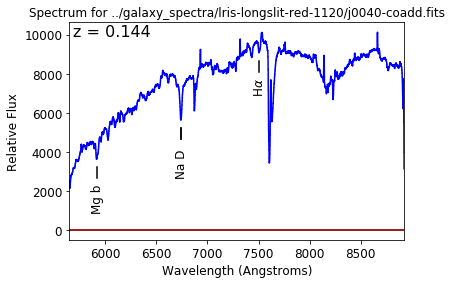

In [3]:
#%matplotlib notebook
spec1.smooth(7)
spec1.mark_lines('abs', z=0.144, usesmooth=True)

In [4]:
lamda_galaxy = spec2['wav']
spectra_galaxy = spec2['flux']
variance_spectra_galaxy = spec2['var']
lamda_galaxy_range =  [lamda_galaxy[0], lamda_galaxy[-1]]


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       5921.34
Na I (D)      5889.95       6738.10
Na I (D)      5895.92       6744.93
H-alpha       6562.80       7507.84



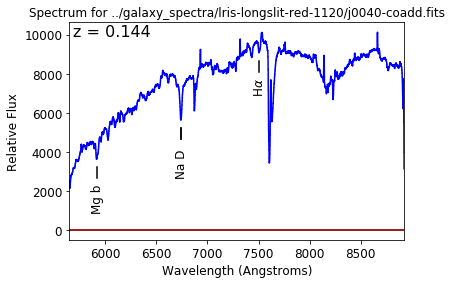

In [5]:
spec2.smooth(7)
spec2.mark_lines('abs', z=0.144, usesmooth=True)

In [6]:
z = 0.144
lam_temp_ini = 3465.0       
lam_temp_fin = 9469.00
lam_range_min = lam_temp_ini*(1+z)
lam_range_max = lam_temp_fin*(1+z)
print(lam_range_min)
print(lam_range_max)

3963.9599999999996
10832.535999999998


In [7]:
spec1.cal_redshift(Mgb=5921.34)


 Observed wavelength for Mgb : 5921.340000

redshift z : 0.143999


In [8]:
spec1.check_temp_coverage(intemp='../TEXT/100006.txt', z=.144)


Covered range for redshift 0.144000 : 3963.960000 - 10832.536000


In [ ]:
flux_rebinned, noise_rebinned, start = spec1.cal_parm(z=0.144)

Velocity scale = 41.037734 km/s
dv = -146501.076073 


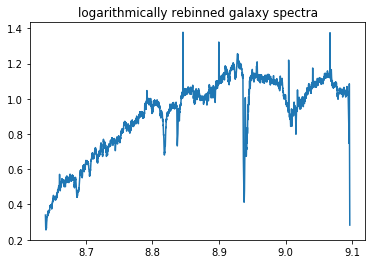

<Figure size 432x288 with 0 Axes>

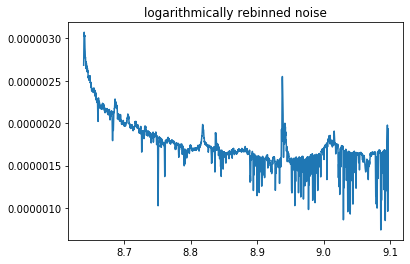

<Figure size 432x288 with 0 Axes>


As no 'fwhm_temp' value is provided, FWHM for the Indo-US templatelibrary will be used as default value


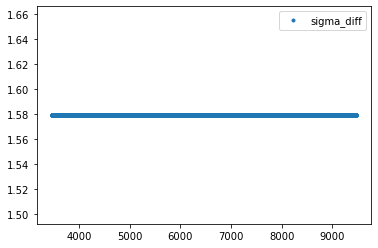

In [9]:
# Calulating velocity scale

velocity_scale = vd.velocity_scale(lamda_galaxy)

# Calculating the parameter 'dv'

dv = vd.wav_dev(lamda_galaxy[0])

# Initial guess for velocity and velocity dispersion

c = 299792.458
vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017)
start2 = [vel, 200.0]  

# Logarithmically rebinning the galaxy spectra

median_spectra_gal = np.median(spectra_galaxy)       # median of the spectra_galaxy
spectra_galaxy_normalized = spectra_galaxy / median_spectra_gal
spectra_galaxy_rebinned, log_lamda_galaxy = util.log_rebin(lamda_galaxy_range, spectra_galaxy_normalized, 
                                                         velscale=velocity_scale)[:2]
plt.plot(log_lamda_galaxy, spectra_galaxy_rebinned)
plt.title('logarithmically rebinned galaxy spectra')
plt.figure()
plt.show()

## Noise

sigma_galaxy_spectra = np.sqrt(variance_spectra_galaxy) 
noise = sigma_galaxy_spectra / median_spectra_gal

noise_rebinned2 = util.log_rebin(lamda_galaxy_range, noise,
                                                          velscale=velocity_scale)[0]

plt.plot(log_lamda_galaxy, noise_rebinned2)
plt.title('logarithmically rebinned noise')
plt.figure()
plt.show()
#print(velo_scale)
#print(np.size(noise_new))


# Calculating the difference in sigma between the instrumental LSF of the galaxy spectra and templates.
# Here sigma of the instrument, 'sig_ins', has been obtained by performing Gaussian fit with several emission 
# lines from the galaxy spectra.

sigma_diff = vd.gen_sigma_diff(sig_ins=1.68, lam_gal=lamda_galaxy)



In [ ]:
len(spectra_galaxy_rebinned)

len(flux_rebinned)
#noise_rebinned2[500:700]
#print(start)
#start2

In [10]:
mask_reg = [(8.6595, 8.6617), (8.7908, 8.7920), (8.8359, 8.8390), (8.8450, 8.8467),
            (8.8991, 8.9003), (8.9344, 8.9465), (8.9551, 8.9584), (9.0039, 9.0054),
            (9.0139, 9.0188), (9.0400, 9.0417), (9.0656, 9.0709), (9.0938, 9.0967)]

Velocity scale = 41.037734 km/s


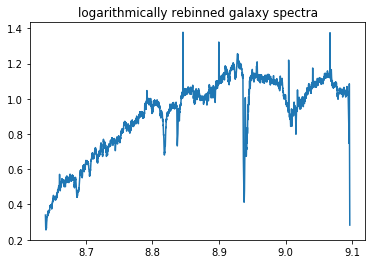

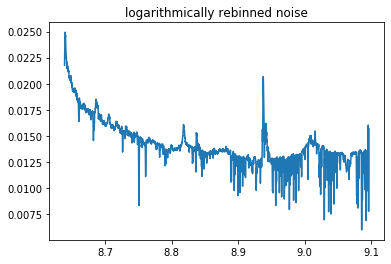

vsyst = -146501.076073 

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value


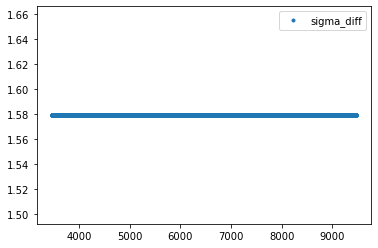


degree : 4
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     41038      1000    -0.096     0.300
chi2/DOF: 3.517; degree = 4; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1271

degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40944      1000    -0.110     0.300
chi2/DOF: 2.773; degree = 5; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1271

degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40933      1000    -0.102     0.300
chi2/DOF: 2.683; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1271

degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     40936      1000    -0.102     0.300
chi2/DOF: 2.673; degree = 7; mdegree = 0
method = capfit; Jac

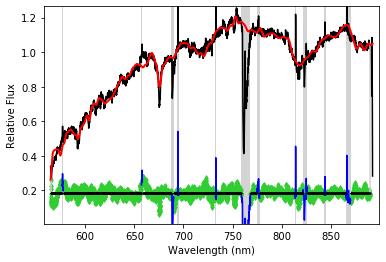

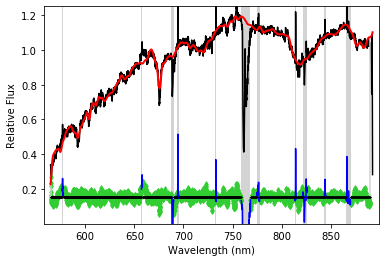

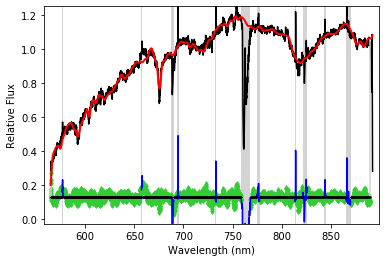

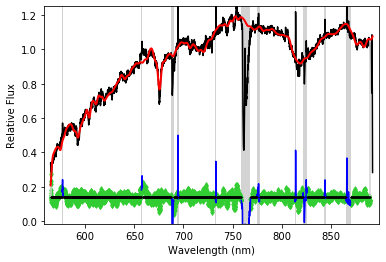

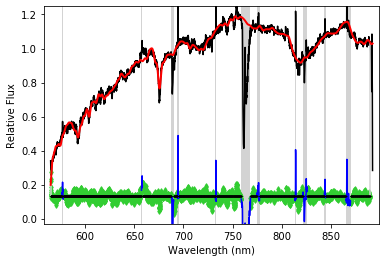

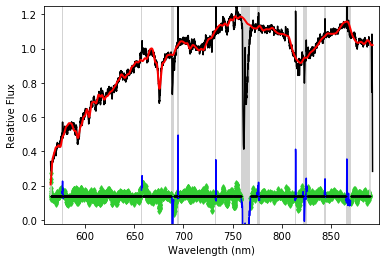

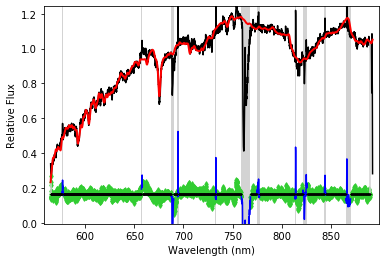

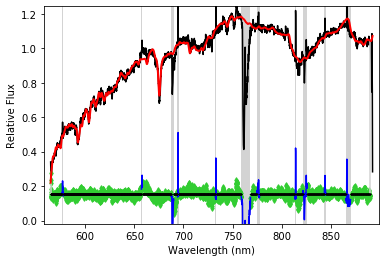

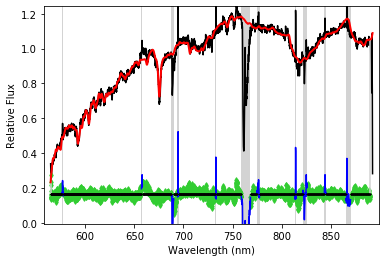

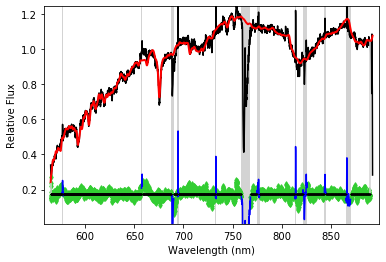

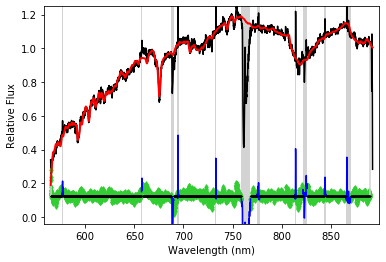

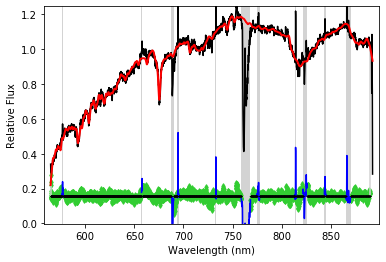

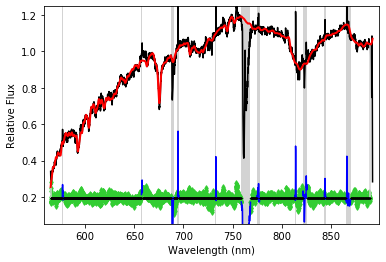

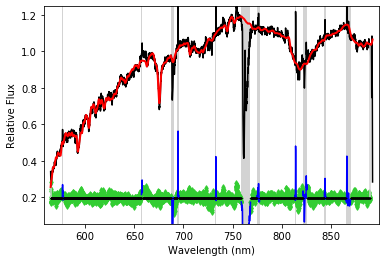

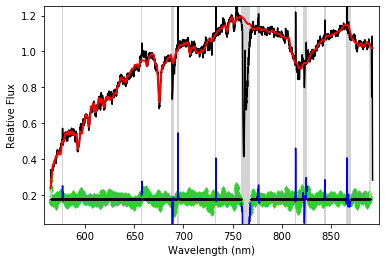

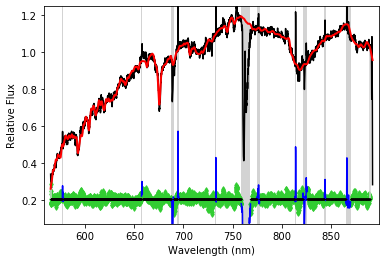

<Figure size 432x288 with 0 Axes>

In [11]:
spec1.cal_veldis(z=0.144, lib_path='../TEXT/*', sig_ins=1.68, mask_reg=mask_reg, degree=[4,20])

<Figure size 432x288 with 0 Axes>

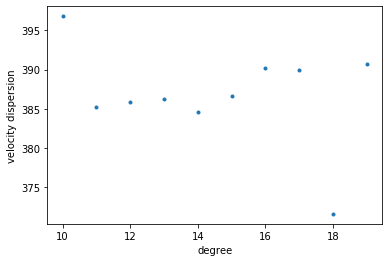

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(spec1.deg[6:], spec1.vel_dis[6:], '.')
plt.xlabel('degree')
plt.ylabel('velocity dispersion')
plt.figure()

<Figure size 432x288 with 0 Axes>

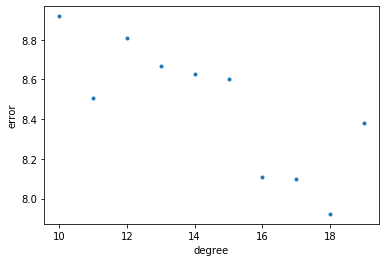

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(spec1.deg[6:], spec1.error[6:], '.')
plt.xlabel('degree')
plt.ylabel('error')
plt.figure()

In [ ]:
temp_spec = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.68)

In [ ]:
templates = vd.gen_rebinned_templates(lib_path='../TEXT/*', temp_num=1271, sigma_diff=sigma_diff,
                                      v=velocity_scale)

In [ ]:
mask = spec1.masking(pixel_range=mask_reg)
mask2 = vd.masking(mask_reg, log_lamda_galaxy)

In [ ]:
degree = np.arange(4, 20)
error = np.zeros(len(degree))
#start_n = [start2[0], 150]
velocity_dispersion = np.zeros(len(degree))
for i, d in enumerate(degree):
    pp = ppxf(templates, spectra_galaxy_rebinned, noise_rebinned2, velocity_scale, start2, moments=4,
            plot=True, vsyst=dv, degree=d, mask=mask2, lam=np.exp(log_lamda_galaxy))
    velocity_dispersion[i] = pp.sol[1] 
    error[i] = pp.error[1]
    plt.figure()
    print('degree : %d' %degree[i])
    [print('%d, %f'%(i,w)) for i, w in enumerate(pp.weights) if w>10]

In [ ]:
#start_new = [start[0], 150]
degree = np.arange(4,20)
velocity_dispersion = np.zeros(len(degree))
error = np.zeros(len(degree))

for i, d in enumerate(degree):
    print('degree : %d' %degree[i])
    pp = ppxf(templates, flux_rebinned, noise_rebinned, spec1.v, start, moments=4,
            plot=True, vsyst=spec1.vsyst, degree=d, mask=mask, lam=np.exp(spec1.wav_rebinned))
    velocity_dispersion[i] = pp.sol[1]
    error[i] = pp.error[1]
    plt.figure()
    [print('%d, %f'%(i,w)) for i, w in enumerate(pp.weights) if w>10]

In [ ]:
plt.plot(degree[6:], velocity_dispersion[6:], '.')
plt.xlabel('degree')
plt.ylabel('velocity dispersion')
plt.figure()

In [ ]:
pp = ppxf(templates, spectra_galaxy_rebinned, noise_rebinned, velocity_scale, start, moments=4,
              plot=True, vsyst=dv, degree=4, mask=mask, lam=np.exp(log_lamda_galaxy), 
              sky=sky_spectra_rebinned) 

In [ ]:
a = [0, 2, 0 , 5, 0 , 8]
[print(i) for i in a if i>0]    

In [ ]:
plt.plot(spec1.wav, spec1.flux)

In [ ]:
np.min(temp_spec-templates)

In [ ]:
np.max(flux_rebinned - spectra_galaxy_rebinned)

In [ ]:
np.max(noise_rebinned - noise_rebinned2)

In [ ]:
spec1.v

In [ ]:
velocity_scale

In [ ]:
log_lamda_galaxy

In [ ]:
spec1.wav_rebinned

In [ ]:
lamda_galaxy_range

In [ ]:
spec1.wav

In [ ]:
start2

In [ ]:
start

In [ ]:
a = glob.glob('../TEXT/*')

In [ ]:
a[1066]

In [ ]:
spec1.v

In [ ]:
velocity_scale

In [ ]:
dv2

In [ ]:
dv

In [ ]:
np.max(spec1.wav_rebinned - log_lamda_galaxy)

In [ ]:
spec1.var